In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


In [2]:
data = 'dataset/svm/cell_samples.csv'
df = pd.read_csv(data)

In [3]:
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
# Index features in DataFrame
col_names = df.columns
col_names

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [6]:
# Because i check there's 16 data null with symbol '?', we replace to NaN

df.replace('?', pd.NA, inplace=True)  # Use pd.NA to represent missing values in pandas

# In percentage
df.isna().sum() / len(df) * 100

ID             0.000000
Clump          0.000000
UnifSize       0.000000
UnifShape      0.000000
MargAdh        0.000000
SingEpiSize    0.000000
BareNuc        2.288984
BlandChrom     0.000000
NormNucl       0.000000
Mit            0.000000
Class          0.000000
dtype: float64

In [7]:
# We want to implace the NaN values with 0.
df['BareNuc'].fillna(0, inplace=True)

In [8]:
# Check again if null values has been filled

df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [9]:
# Distribution in Class column
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [10]:
# View percentage distribution of target_class
df['Class'].value_counts()/float(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [11]:
# Summary dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [12]:
# Check if there any missing values in variables
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [13]:
# Summary statistics dataset in numerical variables
round(df.describe(), 2)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00
mean,1071704.10,4.42,3.13,3.21,2.81,3.22,3.44,2.87,1.59,2.69
std,617095.73,2.82,3.05,2.97,2.86,2.21,2.44,3.05,1.72,0.95
min,61634.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,870688.50,2.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00
50%,1171710.00,4.00,1.00,1.00,1.00,2.00,3.00,1.00,1.00,2.00
75%,1238298.00,6.00,5.00,5.00,4.00,4.00,5.00,4.00,1.00,4.00
max,13454352.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


Text(0, 0.5, 'NormNucl')

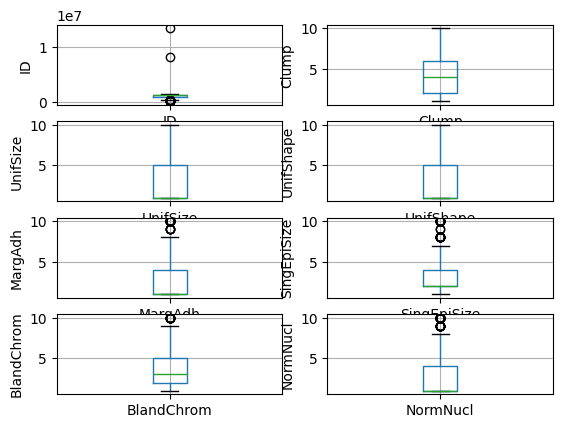

In [14]:
# Draw boxplots to visualize any outliers

plt.subplot(4,2,1)
fig = df.boxplot(column='ID')
fig.set_title('')
fig.set_ylabel('ID')

plt.subplot(4,2,2)
fig = df.boxplot(column='Clump')
fig.set_title('')
fig.set_ylabel('Clump')

plt.subplot(4,2,3)
fig = df.boxplot(column='UnifSize')
fig.set_title('')
fig.set_ylabel('UnifSize')

plt.subplot(4,2,4)
fig = df.boxplot(column='UnifShape')
fig.set_title('')
fig.set_ylabel('UnifShape')

plt.subplot(4,2,5)
fig = df.boxplot(column='MargAdh')
fig.set_title('')
fig.set_ylabel('MargAdh')

plt.subplot(4,2,6)
fig = df.boxplot(column='SingEpiSize')
fig.set_title('')
fig.set_ylabel('SingEpiSize')

plt.subplot(4,2,7)
fig = df.boxplot(column='BlandChrom')
fig.set_title('')
fig.set_ylabel('BlandChrom')

plt.subplot(4,2,8)
fig = df.boxplot(column='NormNucl')
fig.set_title('')
fig.set_ylabel('NormNucl')


In [15]:
# Declare vector feature and target variable, the target is 'Class'
X = df.drop(['Class'], axis=1)
y = df['Class']

# Import train test and split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
X_train.shape, X_test.shape

((489, 10), (210, 10))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [24]:
# Membangun model SVM tanpa tuning hyperparamater

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


model = LinearSVC(loss = 'hinge' , dual=True)
model.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.52%
_______________________________________________
CLASSIFICATION REPORT:
                    2           4  accuracy   macro avg  weighted avg
precision    0.981013    0.936416  0.965235    0.958714      0.965691
recall       0.965732    0.964286  0.965235    0.965009      0.965235
f1-score     0.973312    0.950147  0.965235    0.961730      0.965354
support    321.000000  168.000000  0.965235  489.000000    489.000000
_______________________________________________
Confusion Matrix: 
 [[310  11]
 [  6 162]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
                    2          4  accuracy   macro avg  weighted avg
precision    0.964286   0.971429  0.966667    0.967857      0.966769
recall       0.985401   0.931507  0.966667    0.958454      0.966667
f1-score     0.974729   0.951049  0.966667    0.962889      0.966498
support    137.000000  73.000000  0.966667  210.000000    210.00000

In [54]:
# Membangun model SVM dengan tuning hyperparamater default

hyperparam_default_model = SVC()
hyperparam_default_model.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    

print_score(hyperparam_default_model, X_train, y_train, X_test, y_test, train=True)
print_score(hyperparam_default_model, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 96.93%
_______________________________________________
CLASSIFICATION REPORT:
                    2           4  accuracy   macro avg  weighted avg
precision    0.984177    0.942197  0.969325    0.963187      0.969754
recall       0.968847    0.970238  0.969325    0.969543      0.969325
f1-score     0.976452    0.956012  0.969325    0.966232      0.969430
support    321.000000  168.000000  0.969325  489.000000    489.000000
_______________________________________________
Confusion Matrix: 
 [[311  10]
 [  5 163]]

Test Result:
Accuracy Score: 97.62%
_______________________________________________
CLASSIFICATION REPORT:
                    2          4  accuracy   macro avg  weighted avg
precision    0.978261   0.972222   0.97619    0.975242      0.976162
recall       0.985401   0.958904   0.97619    0.972153      0.976190
f1-score     0.981818   0.965517   0.97619    0.973668      0.976152
support    137.000000  73.000000   0.97619  210.000000    210.00000

In [55]:
# Mencoba menginitiate classifier menggunakan kernel rbf (radial basic function) dengan C=100.0

# instantiate classifier with rbf kernel and C=100
# svc=SVC(C=100.0) 

# # fit classifier to training set
# svc.fit(X_train,y_train)
# # make predictions on test set
# y_pred=svc.predict(X_test)
# # compute and print accuracy score
# print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

rbf_100_model = SVC(C=100.0)
rbf_100_model.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    

print_score(rbf_100_model, X_train, y_train, X_test, y_test, train=True)
print_score(rbf_100_model, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               2      4  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    321.0  168.0       1.0      489.0         489.0
_______________________________________________
Confusion Matrix: 
 [[321   0]
 [  0 168]]

Test Result:
Accuracy Score: 95.24%
_______________________________________________
CLASSIFICATION REPORT:
                    2          4  accuracy   macro avg  weighted avg
precision    0.956835   0.943662  0.952381    0.950248      0.952255
recall       0.970803   0.917808  0.952381    0.944306      0.952381
f1-score     0.963768   0.930556  0.952381    0.947162      0.952223
support    137.000000  73.000000  0.952381  210.000000    210.000000
_______________________________________________
Conf

In [56]:
# Mencoba menginitiate classifier menggunakan kernel linear dengan C=1.0

linear_1_model = SVC(kernel='linear', C=1.0)
linear_1_model.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    

print_score(linear_1_model, X_train, y_train, X_test, y_test, train=True)
print_score(linear_1_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.52%
_______________________________________________
CLASSIFICATION REPORT:
                    2           4  accuracy   macro avg  weighted avg
precision    0.981013    0.936416  0.965235    0.958714      0.965691
recall       0.965732    0.964286  0.965235    0.965009      0.965235
f1-score     0.973312    0.950147  0.965235    0.961730      0.965354
support    321.000000  168.000000  0.965235  489.000000    489.000000
_______________________________________________
Confusion Matrix: 
 [[310  11]
 [  6 162]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
                    2          4  accuracy   macro avg  weighted avg
precision    0.964286   0.971429  0.966667    0.967857      0.966769
recall       0.985401   0.931507  0.966667    0.958454      0.966667
f1-score     0.974729   0.951049  0.966667    0.962889      0.966498
support    137.000000  73.000000  0.966667  210.000000    210.00000

In [107]:
# Mencoba menginitiate classifier menggunakan kernel linear dengan C=100.0

linear_100_model = SVC(kernel='linear', C=100.0)
linear_100_model.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    

print_score(linear_100_model, X_train, y_train, X_test, y_test, train=True)
print_score(linear_100_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.52%
_______________________________________________
CLASSIFICATION REPORT:
                    2           4  accuracy   macro avg  weighted avg
precision    0.981013    0.936416  0.965235    0.958714      0.965691
recall       0.965732    0.964286  0.965235    0.965009      0.965235
f1-score     0.973312    0.950147  0.965235    0.961730      0.965354
support    321.000000  168.000000  0.965235  489.000000    489.000000
_______________________________________________
Confusion Matrix: 
 [[310  11]
 [  6 162]]

Test Result:
Accuracy Score: 97.14%
_______________________________________________
CLASSIFICATION REPORT:
                    2          4  accuracy   macro avg  weighted avg
precision    0.971223   0.971831  0.971429    0.971527      0.971434
recall       0.985401   0.945205  0.971429    0.965303      0.971429
f1-score     0.978261   0.958333  0.971429    0.968297      0.971334
support    137.000000  73.000000  0.971429  210.000000    210.00000

In [108]:
# Compare the train-set and test-set accuracy pada SVM Linear dengan rbf 100

y_pred_train = linear_100_model.predict(X_train)
y_pred_train

array([4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4,

In [100]:
# Kita bisa menggunakan hasil SVM terbaik, dengan selisih training set dan test set yang paling rendah, sehingga semakin kecil kemungkinan untuk overfitting

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9652


Untuk Akurasi training-set adalah 0.9652, dibandingkan dengan akurasi test-set yaitu 0.9714. Sehingga kecil kemungkinan untuk dia overfitting. Karena nilainya bisa dikomparasikan dengan wajar.

In [101]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
y_pred_test = linear_100_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[135   2]
 [  4  69]]

True Positives(TP) =  135

True Negatives(TN) =  69

False Positives(FP) =  2

False Negatives(FN) =  4


<Axes: >

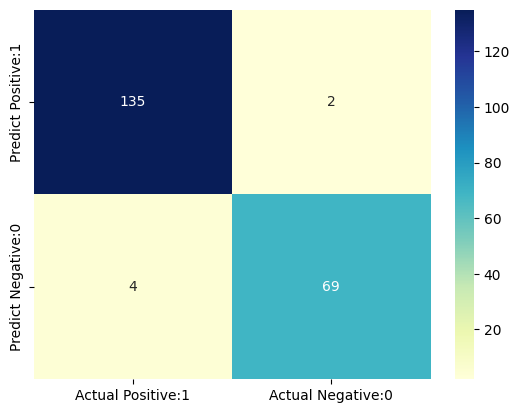

In [102]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.97      0.95      0.96        73

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



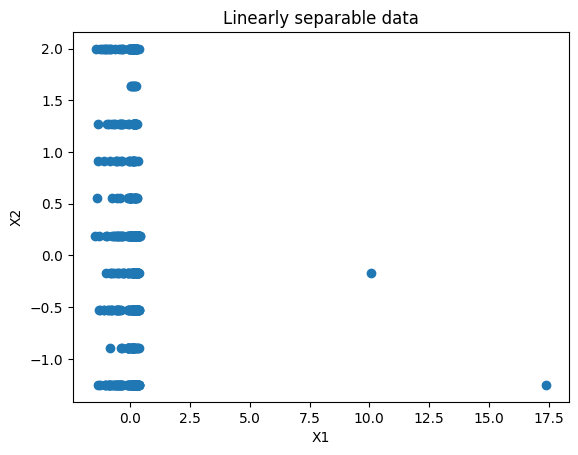

In [122]:
# Generate scatter plot for training data
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

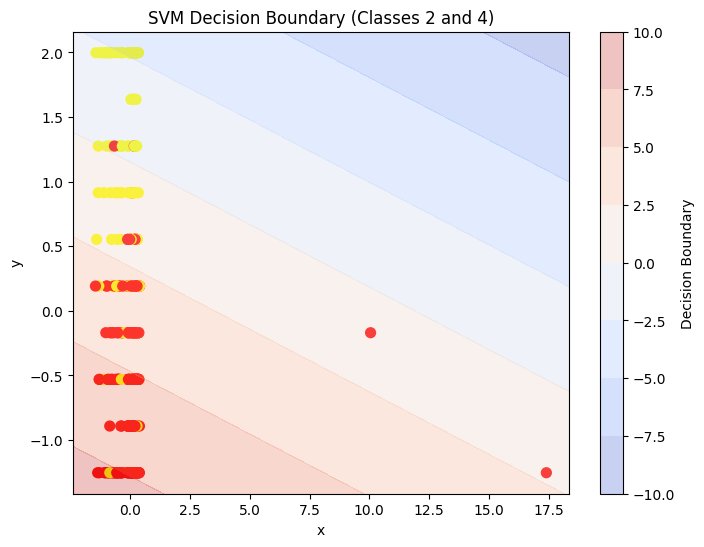

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2D_svm(clf, X, y, elev=30, azim=30):
    # Filter data to include only classes 2 and 4
    X_filtered = X[np.logical_or(y == 2, y == 4)]
    y_filtered = y[np.logical_or(y == 2, y == 4)]
    
    # Create a new figure
    fig = plt.figure(figsize=(8, 6))
    
    # Scatter plot of filtered data points
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, s=50, cmap='autumn')
    
    # Create a meshgrid to plot decision boundary
    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
    
    # Plot decision boundary
    plt.contourf(xx, yy, zz, alpha=0.3, cmap='coolwarm')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('SVM Decision Boundary (Classes 2 and 4)')
    plt.colorbar(label='Decision Boundary')
    plt.show()

# Assuming linear_100_model, X_train, y_train are defined
plot_2D_svm(linear_100_model, X_train, y_train)
biakla

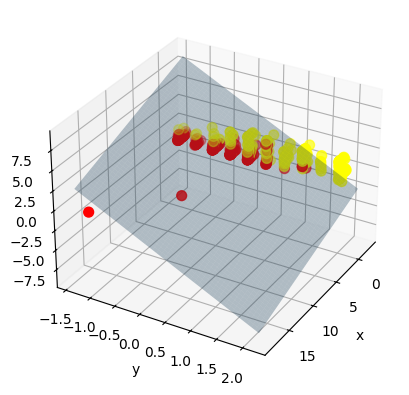

In [125]:
import numpy as np

def plot_3D_svm(clf, X, y, elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    
    # Scatter plot of data points
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='autumn')
    
    # Create a meshgrid to plot decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
    
    # Plot decision boundary
    ax.plot_surface(xx, yy, zz, alpha=0.3)
    
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

# Assuming X_train, y_train, X_test, and y_test are defined
linear_100_model = SVC(kernel='linear', C=100.0)
linear_100_model.fit(X_train, y_train)

# Plotting the SVM decision boundary
plot_3D_svm(linear_100_model, X_train, y_train)
plt.show()
